# Self Employment Data 2015
from [OECD](https://data.oecd.org/emp/self-employment-rate.htm#indicator-chart)

In [1]:
countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'FIN', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 
             'KOR', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 
             'USA', 'CHL', 'COL', 'EST', 'ISR', 'RUS', 'SVN', 'EU28', 'EA19', 'LVA']

male_selfemployment_rates = [12.13246, 15.39631, 18.74896, 9.18314, 20.97991, 18.87097, 
                             13.46109, 39.34802, 13.3356, 16.83681, 25.35344, 29.27118, 
                             12.06516, 27.53898, 31.6945, 19.81751, 17.68489, 9.13669, 
                             24.15699, 22.95656, 19.00245, 21.16428, 13.93171, 8.73181, 
                             30.73483, 19.11255, 7.48383, 25.92752, 52.27145, 12.05042, 
                             15.8517, 8.10048, 19.02411, 19.59021, 19.1384, 14.75558]

female_selfemployment_rates = [8.18631, 10.38607, 11.07756, 8.0069, 12.78461, 
                               9.42761, 7.75637, 29.56566, 8.00408, 7.6802, 8.2774, 18.33204, 
                               9.7313, 23.56431, 32.81488, 13.36444, 11.50045, 4.57464, 
                               17.63891, 13.92678, 10.32846, 12.82925, 6.22453, 9.28793, 
                               38.32216, 10.21743, 5.2896, 25.24502, 49.98448, 6.624, 
                               9.0243, 6.26909, 13.46641, 11.99529, 11.34129, 8.88987]

countries_by_continent = {'AUS':'AUS', 'AUT':'EUR', 'BEL':'EUR', 'CAN':'AM', 
                          'CZE':'EUR', 'FIN':'EUR', 'DEU':'EUR', 'GRC':'EUR', 
                          'HUN':'EUR', 'ISL':'EUR', 'IRL':'EUR', 'ITA':'EUR', 
                          'JPN':'AS',  'KOR':'AS',  'MEX':'AM',  'NLD':'EUR', 
                          'NZL':'AUS', 'NOR':'EUR', 'POL':'EUR', 'PRT':'EUR', 
                          'SVK':'EUR', 'ESP':'EUR', 'SWE':'EUR', 'CHE':'EUR', 
                          'TUR':'EUR', 'GBR':'EUR', 'USA':'AM' , 'CHL':'AM', 
                          'COL':'AM' , 'EST':'EUR', 'ISR':'AS',  'RUS':'EUR', 
                          'SVN':'EUR', 'EU28':'EUR','EA19':'AS', 'LVA':'EUR'}

In [2]:
import pandas as pd

df_male_selfemployment_rates = pd.DataFrame({'countries':countries, 'selfemployment_rates':male_selfemployment_rates})
df_male_selfemployment_rates.head()

,countries,selfemployment_rates
0,AUS,12.13246
1,AUT,15.39631
2,BEL,18.74896
3,CAN,9.18314
4,CZE,20.97991


In [3]:
df_female_selfemployment_rates = pd.DataFrame({'countries':countries, 'selfemployment_rates':female_selfemployment_rates})
df_female_selfemployment_rates.head()

,countries,selfemployment_rates
0,AUS,8.18631
1,AUT,10.38607
2,BEL,11.07756
3,CAN,8.00690
4,CZE,12.78461


In [4]:
df_country_continent = pd.DataFrame(list(countries_by_continent.items()), columns=['country','continent'])
df_country_continent.head()

,country,continent
0,AUS,AUS
1,AUT,EUR
2,BEL,EUR
3,CAN,AM
4,CZE,EUR


# Solutions with Pandas

## Basic Calculations and Statistics

### Exercise 1

Calculate for each country the overallselfemployment_rate:<br>
`df_selfemployment_rate:=(male_selfemployment_rates+female_selfemployment_rates)/2`

(assumes that #women ~#men)

In [5]:
df_s = pd.merge(df_male_selfemployment_rates, df_female_selfemployment_rates, on='countries')
df_s['selfemployment_rates'] = (df_s.selfemployment_rates_x+df_s.selfemployment_rates_y)/2
df_s.head()

,countries,selfemployment_rates_x,selfemployment_rates_y,selfemployment_rates
0,AUS,12.13246,8.18631,10.159385
1,AUT,15.39631,10.38607,12.891190
2,BEL,18.74896,11.07756,14.913260
3,CAN,9.18314,8.00690,8.595020
4,CZE,20.97991,12.78461,16.882260


In [6]:
df_selfemployment_rate=df_s[['countries','selfemployment_rates']]
df_selfemployment_rate.head(5)

,countries,selfemployment_rates
0,AUS,10.159385
1,AUT,12.891190
2,BEL,14.913260
3,CAN,8.595020
4,CZE,16.882260


### Exercise 2
Calculate
- mean
- standard deviation
- maximum
- minimum
- sum

for/of all selfemployment_rates.

In [7]:
print (df_selfemployment_rate.selfemployment_rates.min())
print (df_selfemployment_rate.selfemployment_rates.max())
print (df_selfemployment_rate.selfemployment_rates.sum())
print (df_selfemployment_rate.selfemployment_rates.mean())
print (df_selfemployment_rate.selfemployment_rates.std())

6.386715
51.127965
603.390065
16.7608351389
9.34603245614


In [8]:
df_selfemployment_rate.describe()

,selfemployment_rates
count,36.000000
mean,16.760835
std,9.346032
min,6.386715
25%,10.654563
50%,14.665222
75%,17.357991
max,51.127965


### Exercise 3
Find the Country with the highest `selfemployment_rate`.

In [9]:
df_selfemployment_rate.iloc[df_selfemployment_rate.selfemployment_rates.idxmax()]

countries                  COL
selfemployment_rates    51.128
Name: 28, dtype: object

### Exercise 4
Find the the sum of all `selfemployment_rate`s, which are between `10-15`.

In [10]:
df_selfemployment_rate[(df_selfemployment_rate.selfemployment_rates>10) & (df_selfemployment_rate.selfemployment_rates<15)].selfemployment_rates.sum()

174.81038999999996

### Exercise 5
a) Plot a barchart of the `selfemployment_rate`s by country

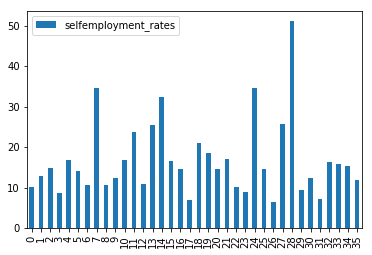

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

df_selfemployment_rate.plot.bar();

In [12]:
# problem in plot above: x-axis are labeled with indices 0...35 => reindex
df_selfemployment_rate.head()

,countries,selfemployment_rates
0,AUS,10.159385
1,AUT,12.891190
2,BEL,14.913260
3,CAN,8.595020
4,CZE,16.882260


In [13]:
df_s1 = df_selfemployment_rate.set_index('countries')
df_s1.head()

,selfemployment_rates
countries,
AUS,10.159385
AUT,12.891190
BEL,14.913260
CAN,8.595020
CZE,16.882260


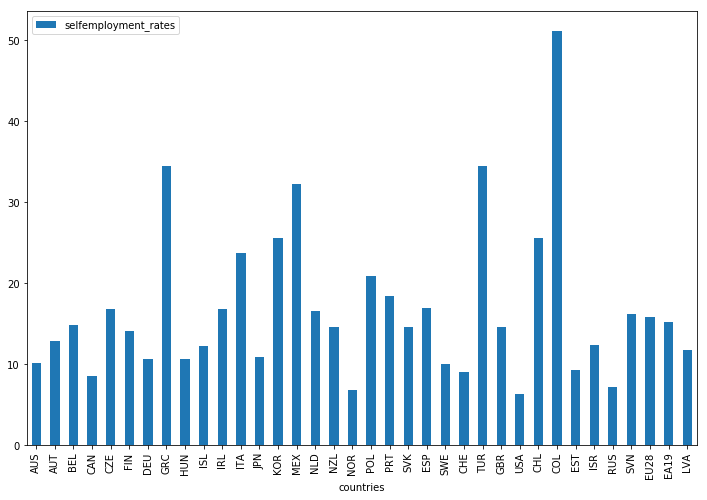

In [14]:
df_s1.plot.bar(figsize=(12,8));

b) Plot a barchart of the male vs. female `selfemployment_rate`s by country (as in [Basic-Plotting](1/5-Basic-Plotting-Exercise.ipynb), but using [pandas plotting facilities](https://pandas.pydata.org/pandas-docs/stable/visualization.html))

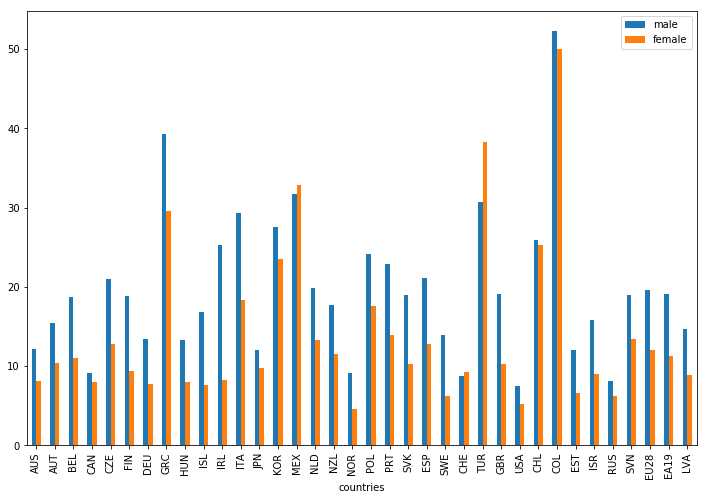

In [15]:
dfs_2 = df_s[['countries','selfemployment_rates_x', 'selfemployment_rates_y']] \
    .rename(columns={'selfemployment_rates_x':'male', 'selfemployment_rates_y': 'female'}) \
    .set_index('countries')
dfs_2.plot.bar(figsize=(12,8));

## Aggregetions

In [16]:
df_cc = pd.merge(df_selfemployment_rate, df_country_continent, left_on='countries', right_on='country')
df_cc.head()

,countries,selfemployment_rates,country,continent
0,AUS,10.159385,AUS,AUS
1,AUT,12.891190,AUT,EUR
2,BEL,14.913260,BEL,EUR
3,CAN,8.595020,CAN,AM
4,CZE,16.882260,CZE,EUR


In [17]:
df_sc = df_cc.drop('countries', axis=1).set_index('country')
df_sc.head()

,selfemployment_rates,continent
country,,
AUS,10.159385,AUS
AUT,12.891190,EUR
BEL,14.913260,EUR
CAN,8.595020,AM
CZE,16.882260,EUR


In [18]:
df_sc.groupby('continent').describe()

selfemployment_rates                                              \
                         count       mean        std        min        25%   
continent                                                                    
AM                         5.0  24.790132  18.377992   6.386715   8.595020   
AS                         4.0  16.031930   6.596049  10.898230  12.053057   
AUS                        2.0  12.376027   3.134806  10.159385  11.267706   
EUR                       25.0  15.622385   6.983643   6.855665  10.669840   

                                            
                 50%        75%        max  
continent                                   
AM         25.586270  32.254690  51.127965  
AS         13.838922  17.817795  25.551645  
AUS        12.376027  13.484349  14.592670  
EUR        14.665455  16.882260  34.528495

In [19]:
df_sc.groupby('continent').mean()

,selfemployment_rates
continent,
AM,24.790132
AS,16.031930
AUS,12.376027
EUR,15.622385
